In [209]:
#IMPORTS

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys,os
%run datuslib.ipynb

In [230]:
#Settings

pd.set_option("max_rows", None)

In [210]:
#CARGA DATA

A_tweets = pd.read_csv(generateAbsolutePath("train.csv"))

In [211]:
#CARGA DE INTERNET PALBRAS NEGATIVAS

A_NEGATIVE_WORDS = getWordInListFromFile('negativeWords.txt')

In [166]:
#OBTIENE TODAS LAS PALABRAS EN INGLES QUE FIGURAN EN CAMPO text, keyword y location

A_tweets3 = A_tweets.copy().dropna()

A_bagOfWords = (A_tweets['text'].sum() + A_tweets3['keyword'].sum() + A_tweets3['location'].sum()).split(' ')

A_bagOfEnglishWords, A_bagOfNonEnglishWords = clasifyWordsRespectToEnglish(A_bagOfWords)

In [173]:
A_words = getDataFrameOfFrecuencies('Palabras',A_bagOfEnglishWords)

In [185]:
A_words2 = A_words.copy()

A_treshold = 5

A_words2 = A_words2[ A_words2.apply(lambda row : len(row['Palabras']) > A_treshold, axis = 1)]

In [195]:
A_TOP_AMOUNT = 25
A_topWords = A_words2.head(A_TOP_AMOUNT)

[Text(0.5, 1.0, 'Palabras mas usadas en Tweets, Localizacion o Keywords (de mas de 5 letras)')]

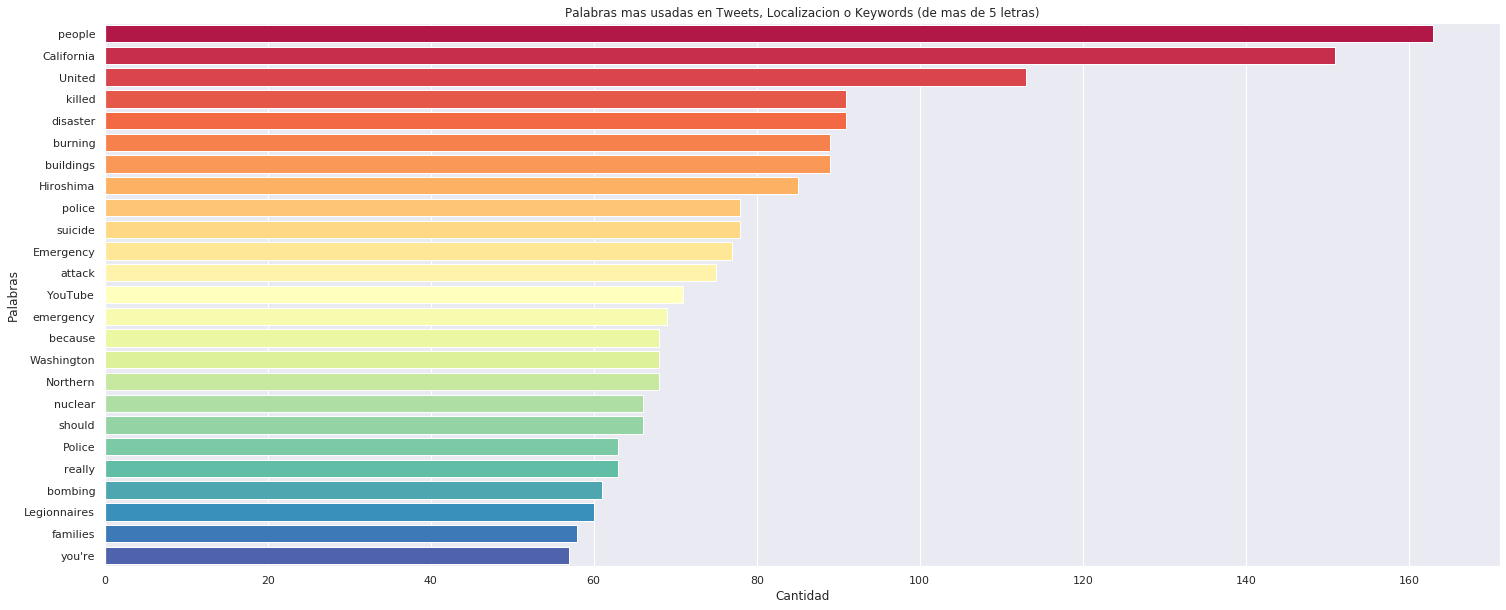

In [197]:
sns.set(font_scale = 1.3)
sns.set(rc = {'figure.figsize':(25,10)})
v3 = sns.barplot(x = 'Cantidad', y = 'Palabras', data = A_topWords, 
                 palette = 'Spectral', saturation = 1)

v3.set(title = 'Palabras mas usadas en Tweets, Localizacion o Keywords (de mas de 5 letras)')

In [212]:
A_words3 = A_words2[ A_words2.apply(lambda row : isIn(row['Palabras'],A_NEGATIVE_WORDS), axis = 1)]

In [217]:
A_TOP_AMOUNT = 25
A_topWords = A_words3.head(A_TOP_AMOUNT)

[Text(0.5, 1.0, 'Palabras negativas mas usadas en Tweets, Localizacion o Keywords (de mas de 5 letras)')]

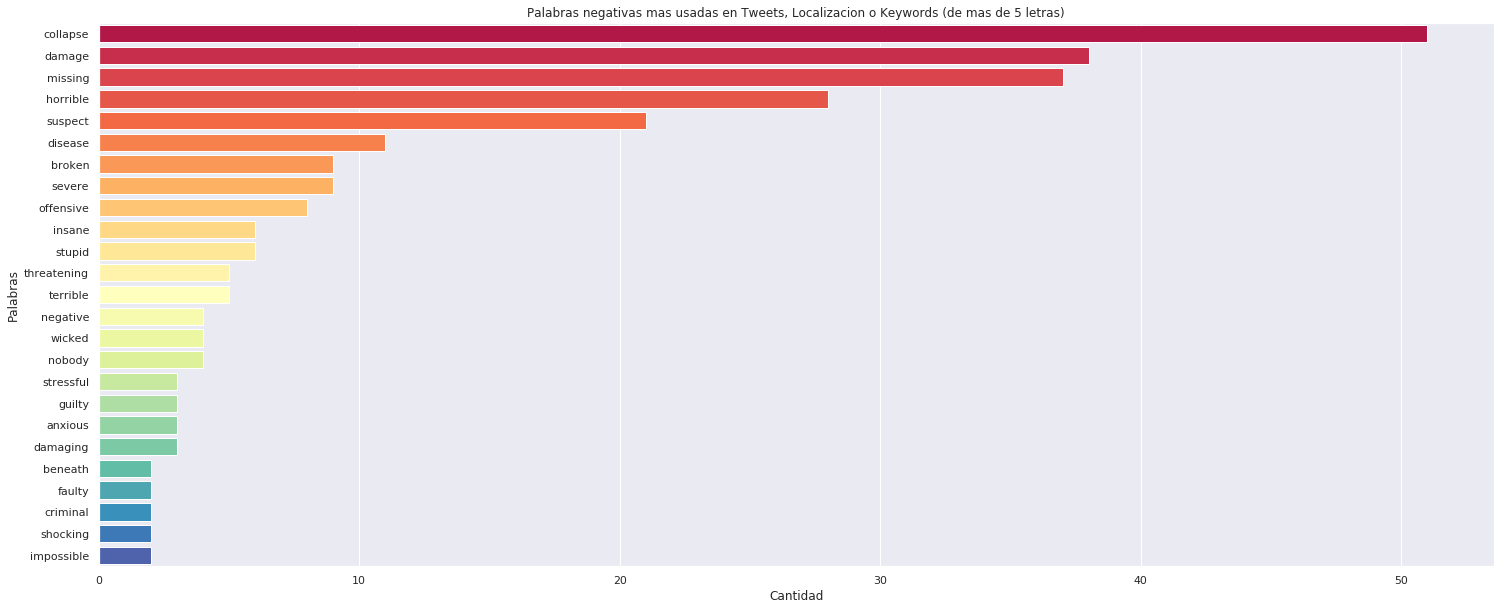

In [219]:
sns.set(font_scale = 1.3)
sns.set(rc = {'figure.figsize':(25,10)})
v3 = sns.barplot(x = 'Cantidad', y = 'Palabras', data = A_topWords, 
                 palette = 'Spectral', saturation = 1)

v3.set(title = 'Palabras negativas mas usadas en Tweets, Localizacion o Keywords (de mas de 5 letras)')

In [220]:
#OBTIENE TODAS LAS PALABRAS EN INGLES QUE FIGURAN EN CAMPO text, keyword y location de tweets con desastre

A_tweets4 = A_tweets[A_tweets['target'] == 1]
A_tweets5 = A_tweets4.copy().dropna()

A_bagOfWordsDisaster = (A_tweets4['text'].sum() + A_tweets5['keyword'].sum() + A_tweets5['location'].sum()).split(' ')

A_bagOfEnglishWordsDisaster, A_bagOfNonEnglishWordsDisaster = clasifyWordsRespectToEnglish(A_bagOfWordsDisaster)

In [221]:
A_wordsDisasters = getDataFrameOfFrecuencies('Palabras',A_bagOfEnglishWordsDisaster)

In [222]:
A_treshold = 5

A_words4 = A_wordsDisasters[ A_wordsDisasters.apply(lambda row : len(row['Palabras']) > A_treshold, axis = 1)]

In [223]:
A_TOP_AMOUNT = 25
A_topWords = A_words4.head(A_TOP_AMOUNT)

[Text(0.5, 1.0, 'Palabras mas usadas en Tweets de desastres, Localizacion o Keywords (de mas de 5 letras)')]

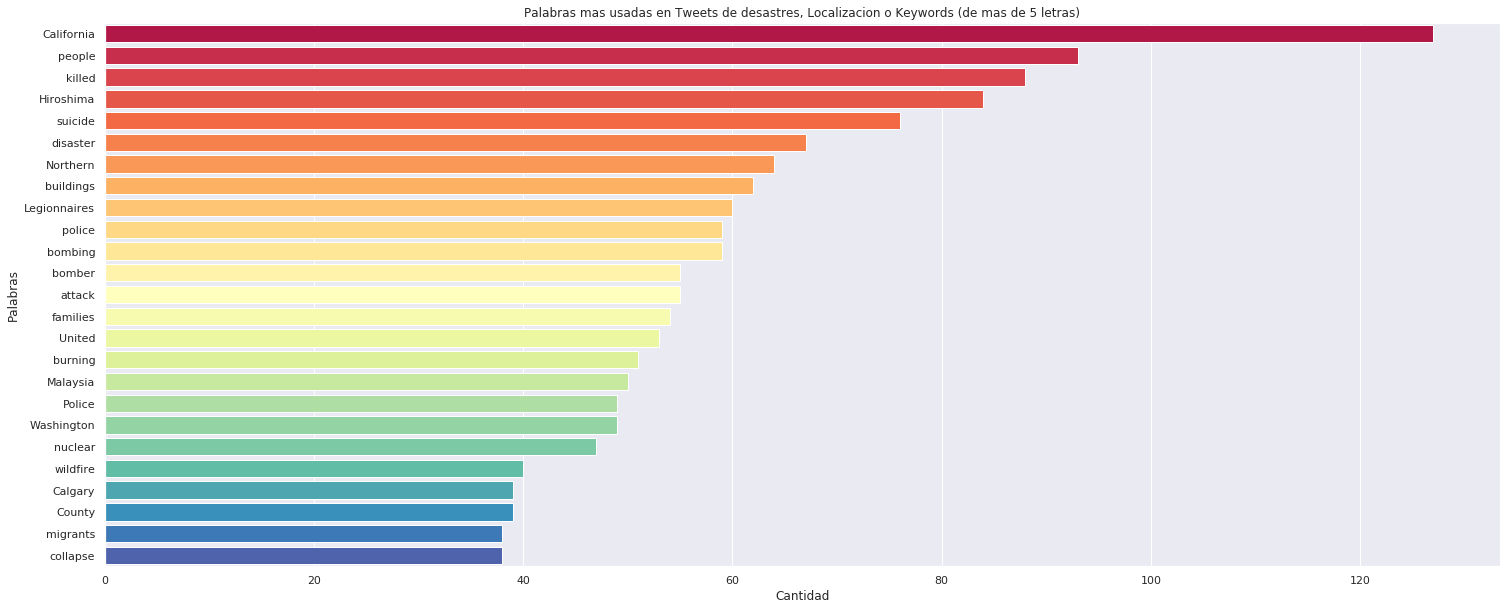

In [225]:
sns.set(font_scale = 1.3)
sns.set(rc = {'figure.figsize':(25,10)})
v3 = sns.barplot(x = 'Cantidad', y = 'Palabras', data = A_topWords, 
                 palette = 'Spectral', saturation = 1)

v3.set(title = 'Palabras mas usadas en Tweets de desastres, Localizacion o Keywords (de mas de 5 letras)')

In [234]:
A_words4.rename(columns = {'Cantidad' : 'Apariciones'}, inplace = True)

/home/axelmpm/.local/lib/python3.6/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [235]:
#Con esto podemos hacer lo que decia nacho

A_words4

,Palabras,Apariciones
38,California,127
35,people,93
395,killed,88
1670,Hiroshima,84
995,suicide,76
62,disaster,67
884,Northern,64
1975,buildings,62
3533,Legionnaires,60
390,police,59


In [244]:
groupedWords = A_words4.groupby('Apariciones').agg(lambda x : list(x)).reset_index().sort_values('Apariciones',ascending = False)

In [245]:
groupedWords

,Apariciones,Palabras
56,127,[California]
55,93,[people]
54,88,[killed]
53,84,[Hiroshima]
52,76,[suicide]
51,67,[disaster]
50,64,[Northern]
49,62,[buildings]
48,60,[Legionnaires]
47,59,"[police, bombing]"


# PLOT: Relacionando negatividad de los tweets con si son desastres o no

In [51]:
#MOLDEANDO DATA (1)

A_tweets1 = A_tweets.copy()


#(AGREGA) CAMPO DE TARGET CON NOMBRES MAS DETALLADOS QUE 1 o 0
A_tweets1['Categoria'] = A_tweets1.apply(lambda row : mapBinaryLabel(row['target'],
                                                                            ['Desastre','No Desastre']), axis = 1)

#(AGREGA) CAMPO DE LONGITUD DE TWEETS
A_tweets1['length'] = A_tweets1.apply(lambda row : len(row['text']), axis = 1)

#(AGREGA) CAMPO DE PALABRAS NEGATIVAS
A_tweets1['usa palabras negativas'] = A_tweets1.apply(lambda row : mapBinaryLabel(hasCertainWords(row['text'],A_NEGATIVE_WORDS),
                                                                                  ['Usa Palabras Negativas','No Usa Palabras Negativas']), axis = 1)


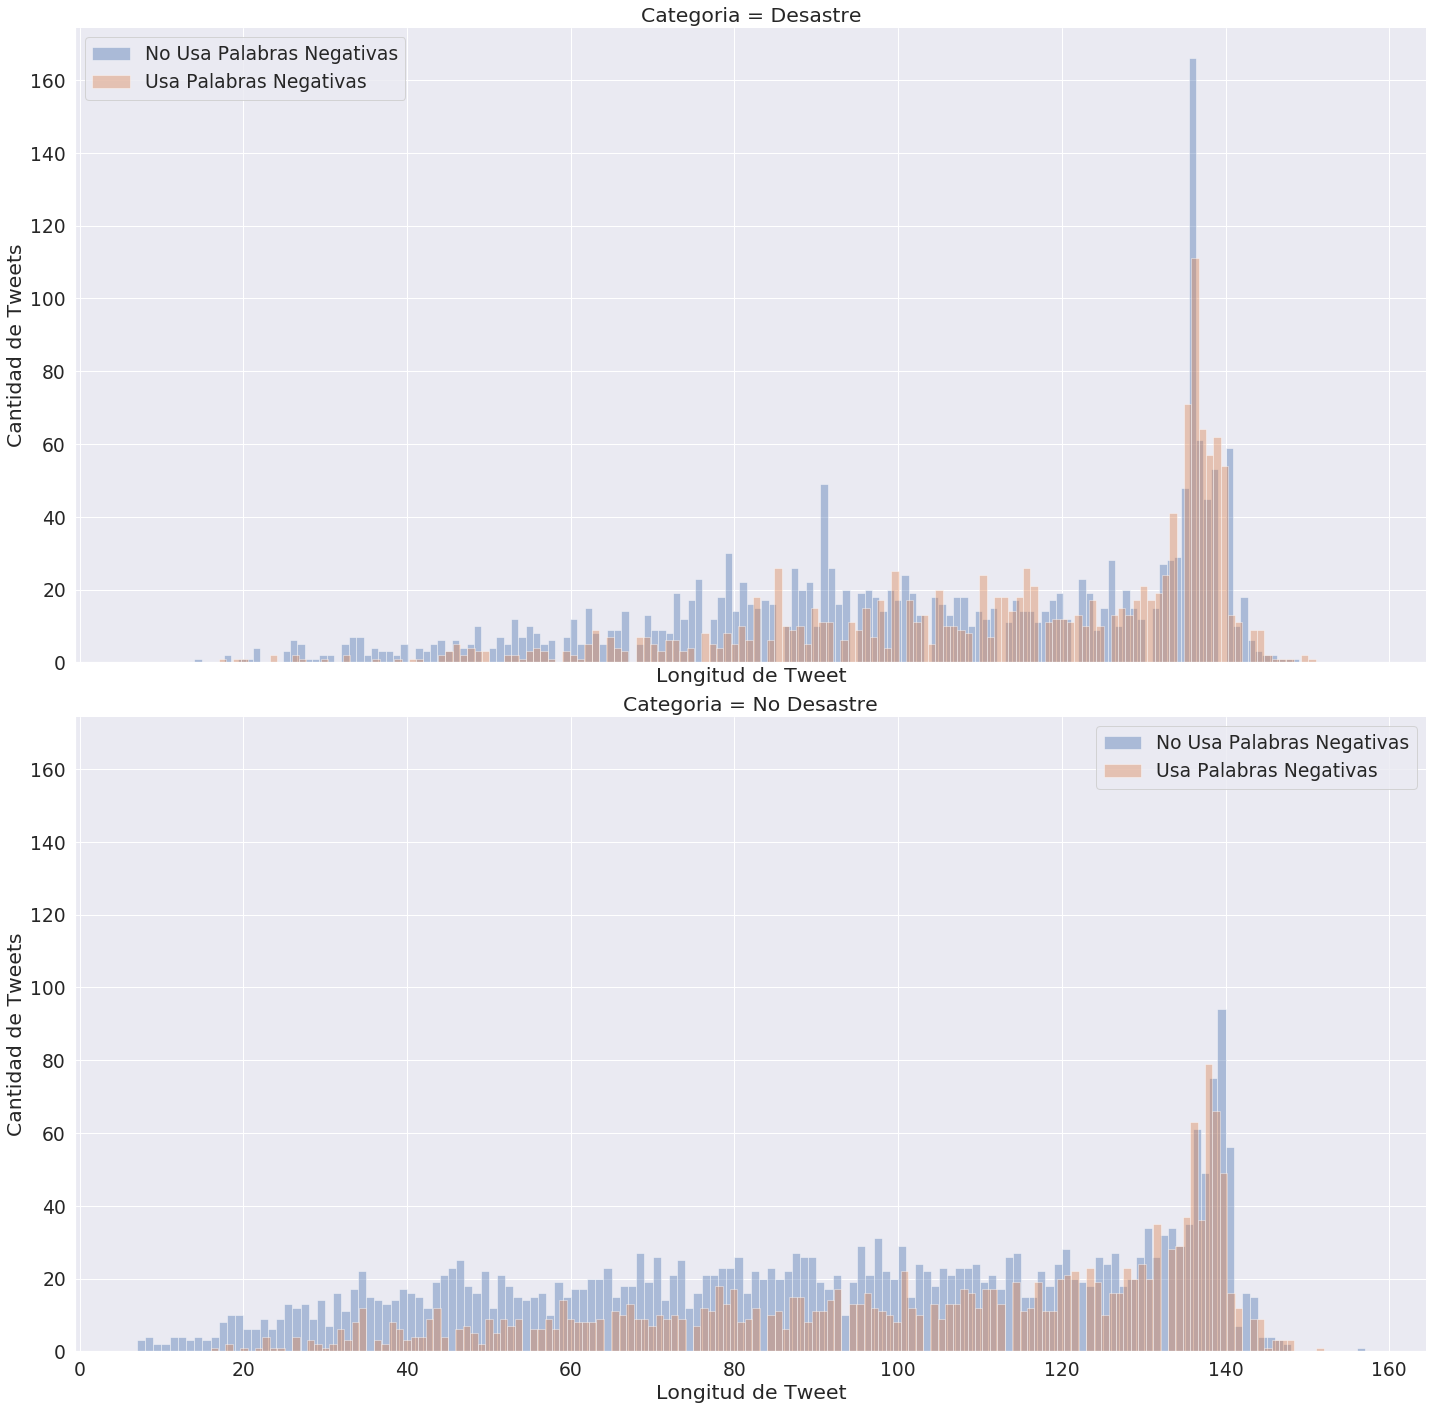

In [86]:
sns.set(font_scale = 1.7)
fg1 = sns.FacetGrid(A_tweets1, hue = 'usa palabras negativas',row = 'Categoria', height = 10, aspect = 2)
v1 = fg1.map(sns.distplot, "length", kde = False, bins = 150 )


for ax in v.axes.ravel():
    ax.legend()
    ax.set(xlabel = 'Longitud de Tweet', ylabel = 'Cantidad de Tweets')


# PLOT: Top usuarios mas mencionados en tweets

In [122]:
#BUSCANDO LOS LOS USUARIOS MAS POPULARES

A_tweets2 = A_tweets.copy()

A_tweets2['appearing users'] = A_tweets.apply(lambda row : extractUsers(row['text']), axis = 1)
A_tweets2 = A_tweets2[A_tweets2.apply(lambda row : len(row['appearing users']) > 0, axis = 1)]
A_tweets2 = A_tweets2['appearing users'].sum()

usersDF = getDataFrameOfFrecuencies('Usuarios',A_tweets2).rename(
                                    columns = {'Cantidad' : 'Cantidad de Menciones en Tweets'})

In [124]:
A_TOP_AMOUNT = 10
A_topUsers = usersDF.head(A_TOP_AMOUNT)

[Text(0.5, 1.0, 'Usuarios mas populares')]

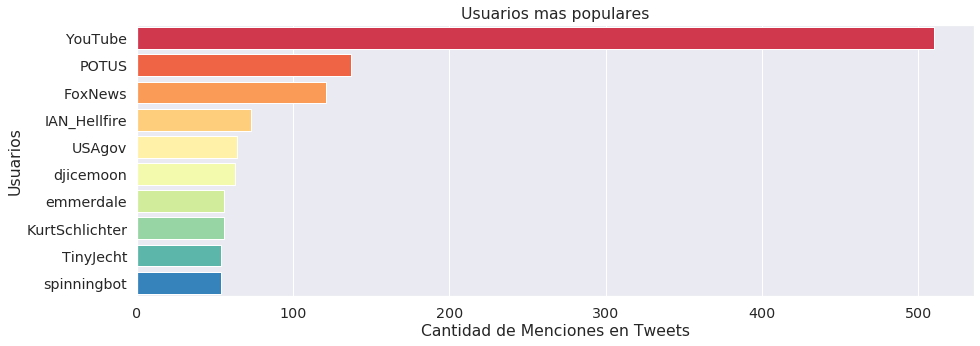

In [137]:
sns.set(font_scale = 1.3)
v2 = sns.barplot(x = 'Cantidad de Menciones en Tweets', y = 'Usuarios', data = A_topUsers, 
                 palette = 'Spectral', saturation = 1)
v2.set(title = 'Usuarios mas populares')